# Lesson 1  
## Exercise 01.1  
Verification of the correct functioning of the pseudo-random number generator provided, contained in the folder `../../Library/PNRG/`, in the files `random.h` and `random.cpp`. For this purpose, it is useful to calculate the mean value of $ r $, a variable representing a (pseudo)random number generated uniformly in the interval $[0,1)$ using the `Rannyu` method from the `Random` class.  

To achieve this, I developed the file `main.cpp`. In this file, I set up the data to verify:  

1. $ \langle r \rangle = \int_0^1 r \, dr = 1/2 $. I then created a plot with the estimate of $ \langle r \rangle $ and its uncertainty, i.e., the standard deviation of the mean for a number of throws $ M \geq 10^4 $ divided into $ N $ blocks. As suggested in class, I used the **blocking method**.  

In computing the statistical uncertainties, i.e., the standard deviation of the mean, you need an estimation of the variance $ \sigma^2 $, the second central moment. First of all, note that the variance can be computed from  
$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$  
What is the best way to estimate $ \sigma^2_A $? Imagine that your Monte Carlo estimation of $ A $ is obtained from a calculation that uses $ M $ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $ M $ Monte Carlo "steps" into $ N $ blocks, with $ N < M $. In each block, you can use your $ M/N $ Monte Carlo "steps" to obtain an estimate of $ A $, let me call it $ A_i $ (mean of the block) with $ i = 1, \ldots, N $, and then you also have $ A^2_i $ with $ i = 1, \ldots, N $.  
At this point, everything becomes clear:  
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$  
and finally the statistical uncertainty with $ N $, number of blocks:  
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$  
So I perform all the statistics with the blocks.  

2. $\sigma^2 = \int_0^1 (r-1/2)^2 \, dr = 1/12$. I then created a plot with the estimate of $ \sigma^2 $ and its uncertainty for a number of throws $ M \geq 10^4$ divided into $ N $ blocks, using the **blocking method** described above. In this case, the uncertainty on the value of $ \sigma^2 $ is the standard deviation of the mean for the estimate of $ \langle (r-1/2)^2 \rangle $.  

3. Since we cannot prove that random events are generated from a particular distribution, we can instead attempt to calculate the probability that the events $ r $ are **not** generated from a uniform distribution.  

Pearson's cumulative test statistic $ \chi^2 $ is a measure of the error between observations, $ O_i $, and expected values, $ E_i $:  
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$  
The numerator is a squared distance between observations, $ O_i $, and expected values, $ E_i $, and thus should be compared (in the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $ E_i $?  

The probability of getting exactly $ k $ (independent) successes, each one with probability $ p $, in $ n $ trials is given by the **Binomial distribution** (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):  
$$Pr(X=k) = \binom{n}{k} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$  
The average of the Binomial distribution is $ \langle X \rangle = np $, the variance is: $ \sigma^2 = np (1-p) $. Thus, if $ p $ is small, we have that $ \sigma^2 \simeq np $, that is $ \sigma^2 \simeq \langle X \rangle $ and this explains the denominator $ E_i $ in $ \chi^2 $.  

So, divide $[0,1]$ into $ M $ identical sub-intervals and implement the $ \chi^2 $ test. Obviously, the number of expected events observed in each sub-interval after $ n $ throws, according to a uniform distribution, is $ np = n \times 1/M = n/M $.  

Fix $ M = 10^2 $ and use for $ n $ the first $ 10^4 $ pseudo-random numbers, then the next $ 10^4 $ pseudo-random numbers, and so on... 100 times.  

Plot $ \chi^2_j $ for $ j = 1, \ldots, 100 $. In this case, the chi-square statistic is:  
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$  

We should expect on average that $ (n_i - n/M)^2 \simeq n/M $ and thus $ \chi^2 \simeq 100 $, i.e., the number of sub-intervals.  
A larger value of $ \chi^2 $ indicates that the hypothesis (that $ n_i $ are drawn from a uniform distribution) is rather unlikely.

# The code
Come detto in classe il metodo della Blocking Average sarà usato molto spesso durante questo laboratorio così ho pensato di creare una classe ad hoc che potesse soddisfare le esigenze future, cercando di renderla il più generale possibile. A tale scopo ho strutturato in questo modo la classe:
```cpp
class BlockAverage{
    public:
        //constructor
        BlockAverage(int M_, int N_) : rnd("../../Library/PRNG/") {
            (M_ % N_ == 0) ? void() : (cerr << "ERROR: M must be a multiple of N" << endl, exit(1));
            M = M_;
            N = N_;
            L = M/N;
        }
        //destructor
        ~BlockAverage(){;}
        //methods
        void Run(std::ofstream& WriteData){
            double ave, ave2;
            double sum = 0, sum2 = 0;
            double sum_prog, sum2_prog;
            double err;

            for (int i = 0 ; i < N ; i++) {
                ave = block(); //computes a one-block average
                ave2 = ave*ave;

                sum += ave;
                sum2 += ave2;

                sum_prog = (double)sum/(i+1);
                sum2_prog = (double)sum2/(i+1);
                err = computeError(sum_prog, sum2_prog, i);
                WriteData << (i+1)*L << " " << sum_prog << " " << err << endl;
        }

        mean = sum_prog;
        meanError = err;
        }

        virtual double block() = 0;
        double GetMean() {return mean;}
        double GetError() {return meanError;}

        protected:
            int M, N, L;
            Random rnd; 
            double mean, meanError;

};

class Uniform_Mean : public BlockAverage{ 

    public:
        Uniform_Mean( int M, int N) : BlockAverage(M, N) {;}
        virtual ~Uniform_Mean() {;}
        double block() override{

            double val = 0;
            for (int i=0 ; i<L ; i++) {val += rnd.Rannyu();}
            return val/L; 
        }
};


Come evidenziato dalla struttura del codice ho mantenuto la generalità della classe definendo il metodo virtuale block() per fare in modo che nelle classi figlie potessi fare override per modificare a piacere il contenuto del metodo. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy

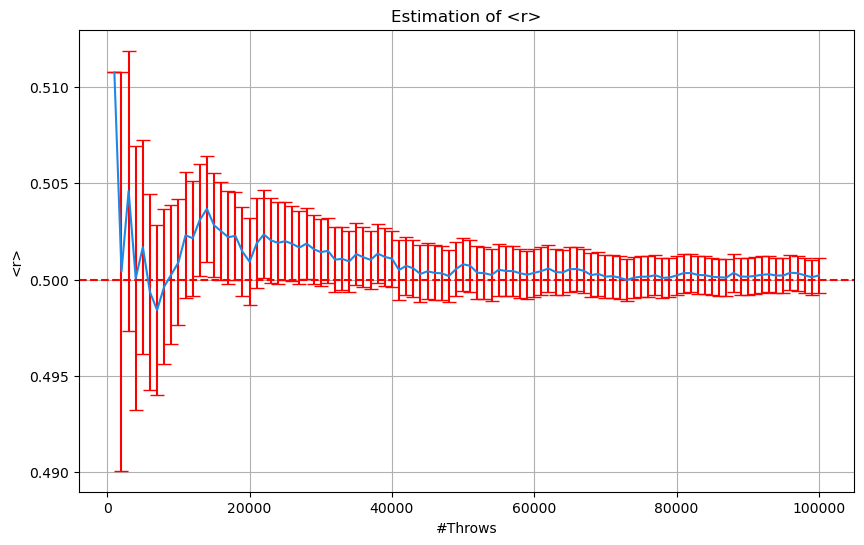

In [12]:
# Leggi i dati dal file
data = pd.read_csv('01.1/dataClass.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
y = data[1]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color = '#1E88E5', ecolor='r', capsize=5)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Estimation of <r>')
plt.grid(True)
plt.show()

This graph shows the trend of the progressive mean value of $\langle r \rangle$ and its error. The compatibility of $\langle r \rangle$ with its expected value can be observed.

Estimation of $\sigma^2$, with an expected value of $\frac{1}{12}$.  
To achieve this, I implemented the `UniformSigma` class in `Library/blockAverage/blockAverage.cpp`

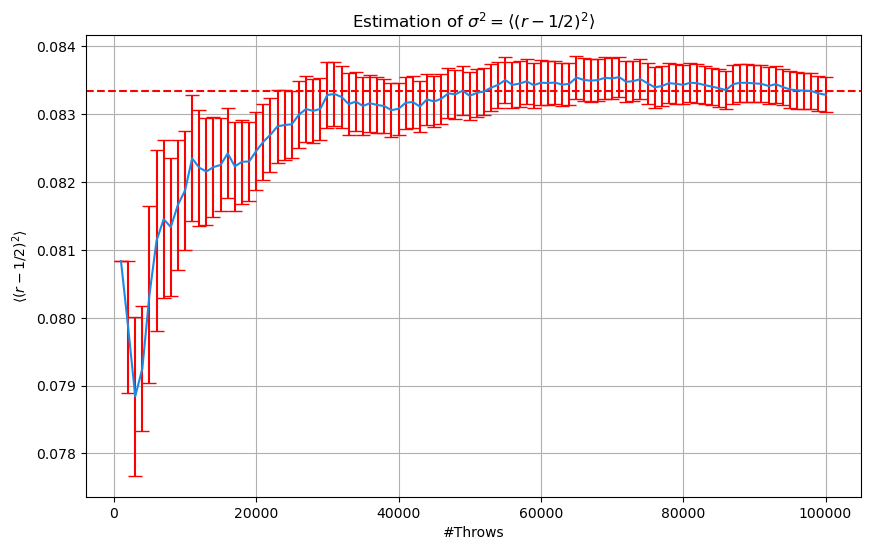

In [13]:
# Leggi i dati dal file
data = pd.read_csv('01.1/dataSigmaClass.dat', sep=' ', header=None)

# Estrai le colonne
x = data[0]
y = data[1]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color = '#1E88E5', ecolor='r', capsize=5)
plt.axhline(y = 1/12, color='r', linestyle='--')
plt.xlabel('#Throws')
plt.ylabel(rf'$\langle(r-1/2)^2\rangle$')
plt.title('Estimation of ' rf'$\sigma^2 = \langle(r-1/2)^2\rangle$')
plt.grid(True)
plt.show()

Now the estimation of $\chi^2$. Per fare questo non ho creato alcuna classe ma lo ho fatto direttamente nel file `01/01.1/main.cpp`. Ho creato un grafico a dispersione dei valori di $\chi^2$ e di seguito un istogramma dei medesimi valori di $\chi^2$. Su quest'ultimo grafico ho effettuato anche un fit gaussiano per vedere dove si attestava il valor medio di $\chi^2$. Infatti come spiegato nella trattazione teorica ci si aspetta un valore di $\chi^2 \simeq 100$. Come testimoniato dai dati del fit riportati nella legenda il valore ottenuto è compatibile entro una $\sigma$ con il valore atteso. 

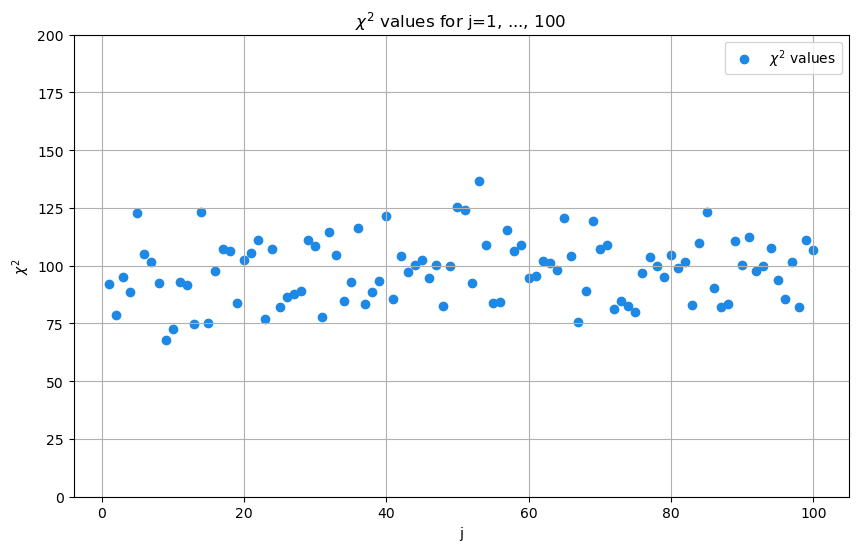

In [14]:
chi2_data = pd.read_csv('01.1/chi2Class.dat', sep=' ', header=None)
chi2_data.columns = ['j', 'chi2']

# Crea un grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(chi2_data['j'], chi2_data['chi2'], color = '#1E88E5', label=r'$\chi^2$ values')
plt.xlabel('j')
plt.ylabel(r'$\chi^2$')
plt.grid(True)
plt.title(r'$\chi^2$ values for j=1, ..., 100')
plt.ylim(0, 200)
plt.legend()
plt.show()

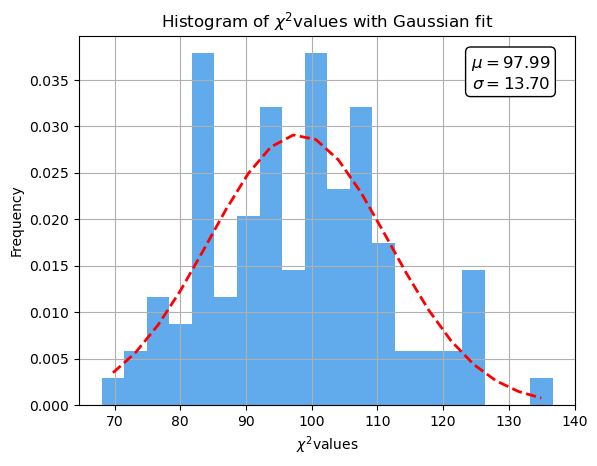

In [15]:
# Leggi i dati dal file chi2.dat
chi2_data = pd.read_csv('01.1/chi2Class.dat', sep=' ', header=None)
chi2_data.columns = ['j', 'chi2']

# Crea un istogramma dei valori della prima colonna
counts, bins, _ = plt.hist(chi2_data['chi2'], bins=20, color = '#1E88E5', alpha=0.7, density=True)

# Calcola il centro di ciascun bin
bin_centers = (bins[:-1] + bins[1:]) / 2

# Esegui il fit con una distribuzione gaussiana
(mu, sigma) = norm.fit(chi2_data['chi2'])

# Crea una distribuzione gaussiana con i parametri ottenuti
y = norm.pdf(bin_centers, mu, sigma)
# Sovrapponi il fit all'istogramma
plt.plot(bin_centers, y, 'r--', linewidth=2)

# Aggiungi etichette e titolo
plt.xlabel(r'$\chi^2$' 'values')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Histogram of 'r'$\chi^2$' 'values with Gaussian fit')
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
plt.text(0.95, 0.95, rf'$\mu={mu:.2f}$''\n' rf'$\sigma={sigma:.2f}$', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=bbox_props)


# Mostra il grafico
plt.show()

## Esercizio 01.2
In questo esercizio abbiamo verificato sperimentalmente l'affermazione condivisa dalla famiglia di Teoremi del Limite centrale. Per tutti vale l'affermazione che la distribuzione di probabilità della somma (normalizzata) di un gran numero di variabili casuali tende ad una data distribuzione regolare (attrattore), che di norma è la Gaussiana o la Lorenziana.

Per fare ciò ho introdotto nella classe ```Random``` definita in `Library/PNRG/random.hpp` dei metodi per la generazione di numeri con una distribuzione esponenziale generica del tipo $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ e per una generica distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ 

In seguito ho generato tre set di grafici. Ciascun grafico rappresenta $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable. Nel quarto grafico di ogni serie, $N=100$, è mostrata la convergenza all'attrattore. Nel caso dello standard and exponential dado la Gaussiana mentre per il Lorentzian dado la distribuzione di Cauchy-Lorentz stessa. 

Per generare dati disposti secondo una distribuzione precisa ho utilizzato il metodo della funzione inversa cioè invertendo la funzione cumulativa.

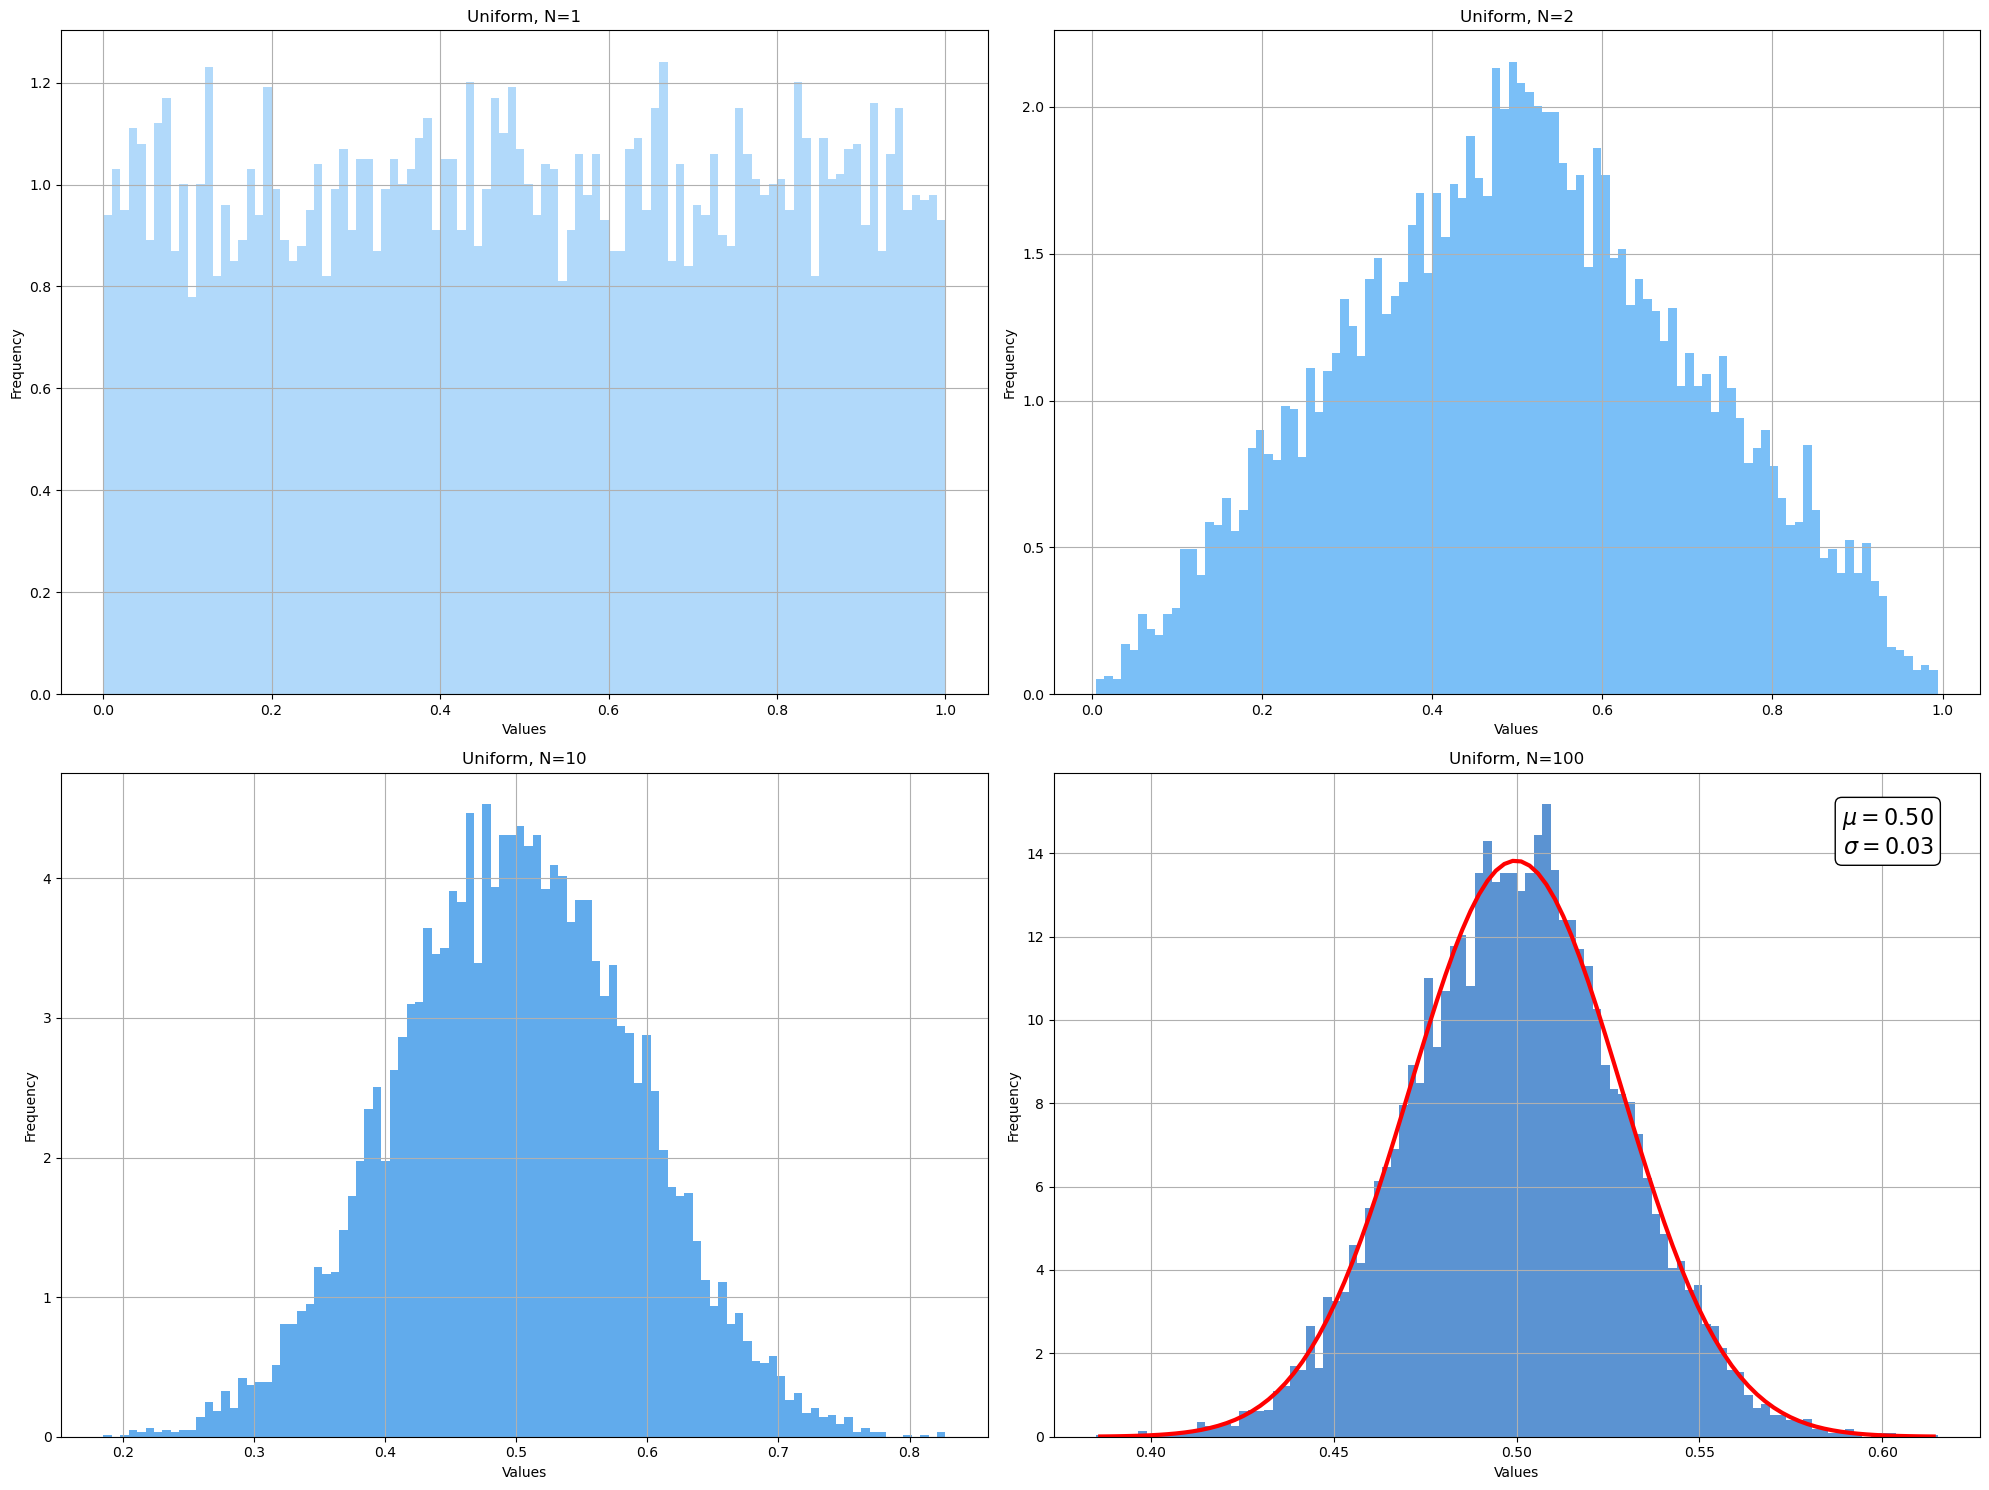

In [16]:
# Funzione per creare un istogramma con o senza fit gaussiano
def create_histogram(ax, data, column, title, color, fit_gaussian=False):
    # Crea l'istogramma
    counts, bins, _ = ax.hist(data[column], bins=100, color=color, alpha=0.7, density=True)
    
    if fit_gaussian:
        bin_centers = (bins[:-1] + bins[1:]) / 2
        (mu, sigma) = norm.fit(data[column])
        y = norm.pdf(bin_centers, mu, sigma)
        ax.plot(bin_centers, y, 'r', linewidth=3)
        # Parametri della distribuzione
        bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
        ax.text(0.95, 0.95, rf'$\mu={mu:.2f}$''\n'rf'$\sigma={sigma:.2f}$', 
                transform=ax.transAxes, fontsize=16, verticalalignment='top', horizontalalignment='right',
                bbox=bbox_props)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    ax.set_title(title)

# Leggi i dati dai file
data0 = pd.read_csv('01.2/output_0.dat', sep=' ', header=None)
data1 = pd.read_csv('01.2/output_1.dat', sep=' ', header=None)
data2 = pd.read_csv('01.2/output_2.dat', sep=' ', header=None)
data3 = pd.read_csv('01.2/output_3.dat', sep=' ', header=None)

# Crea i grafici
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Crea istogrammi per ogni colonna dei file
create_histogram(axs[0, 0], data0, 0, 'Uniform, N=1', '#90CAF9')
create_histogram(axs[0, 1], data1, 0, 'Uniform, N=2', '#42A5F5')
create_histogram(axs[1, 0], data2, 0, 'Uniform, N=10', '#1E88E5')
create_histogram(axs[1, 1], data3, 0, 'Uniform, N=100', '#1565C0', fit_gaussian=True)

# Mostra i grafici
plt.tight_layout()
plt.show()

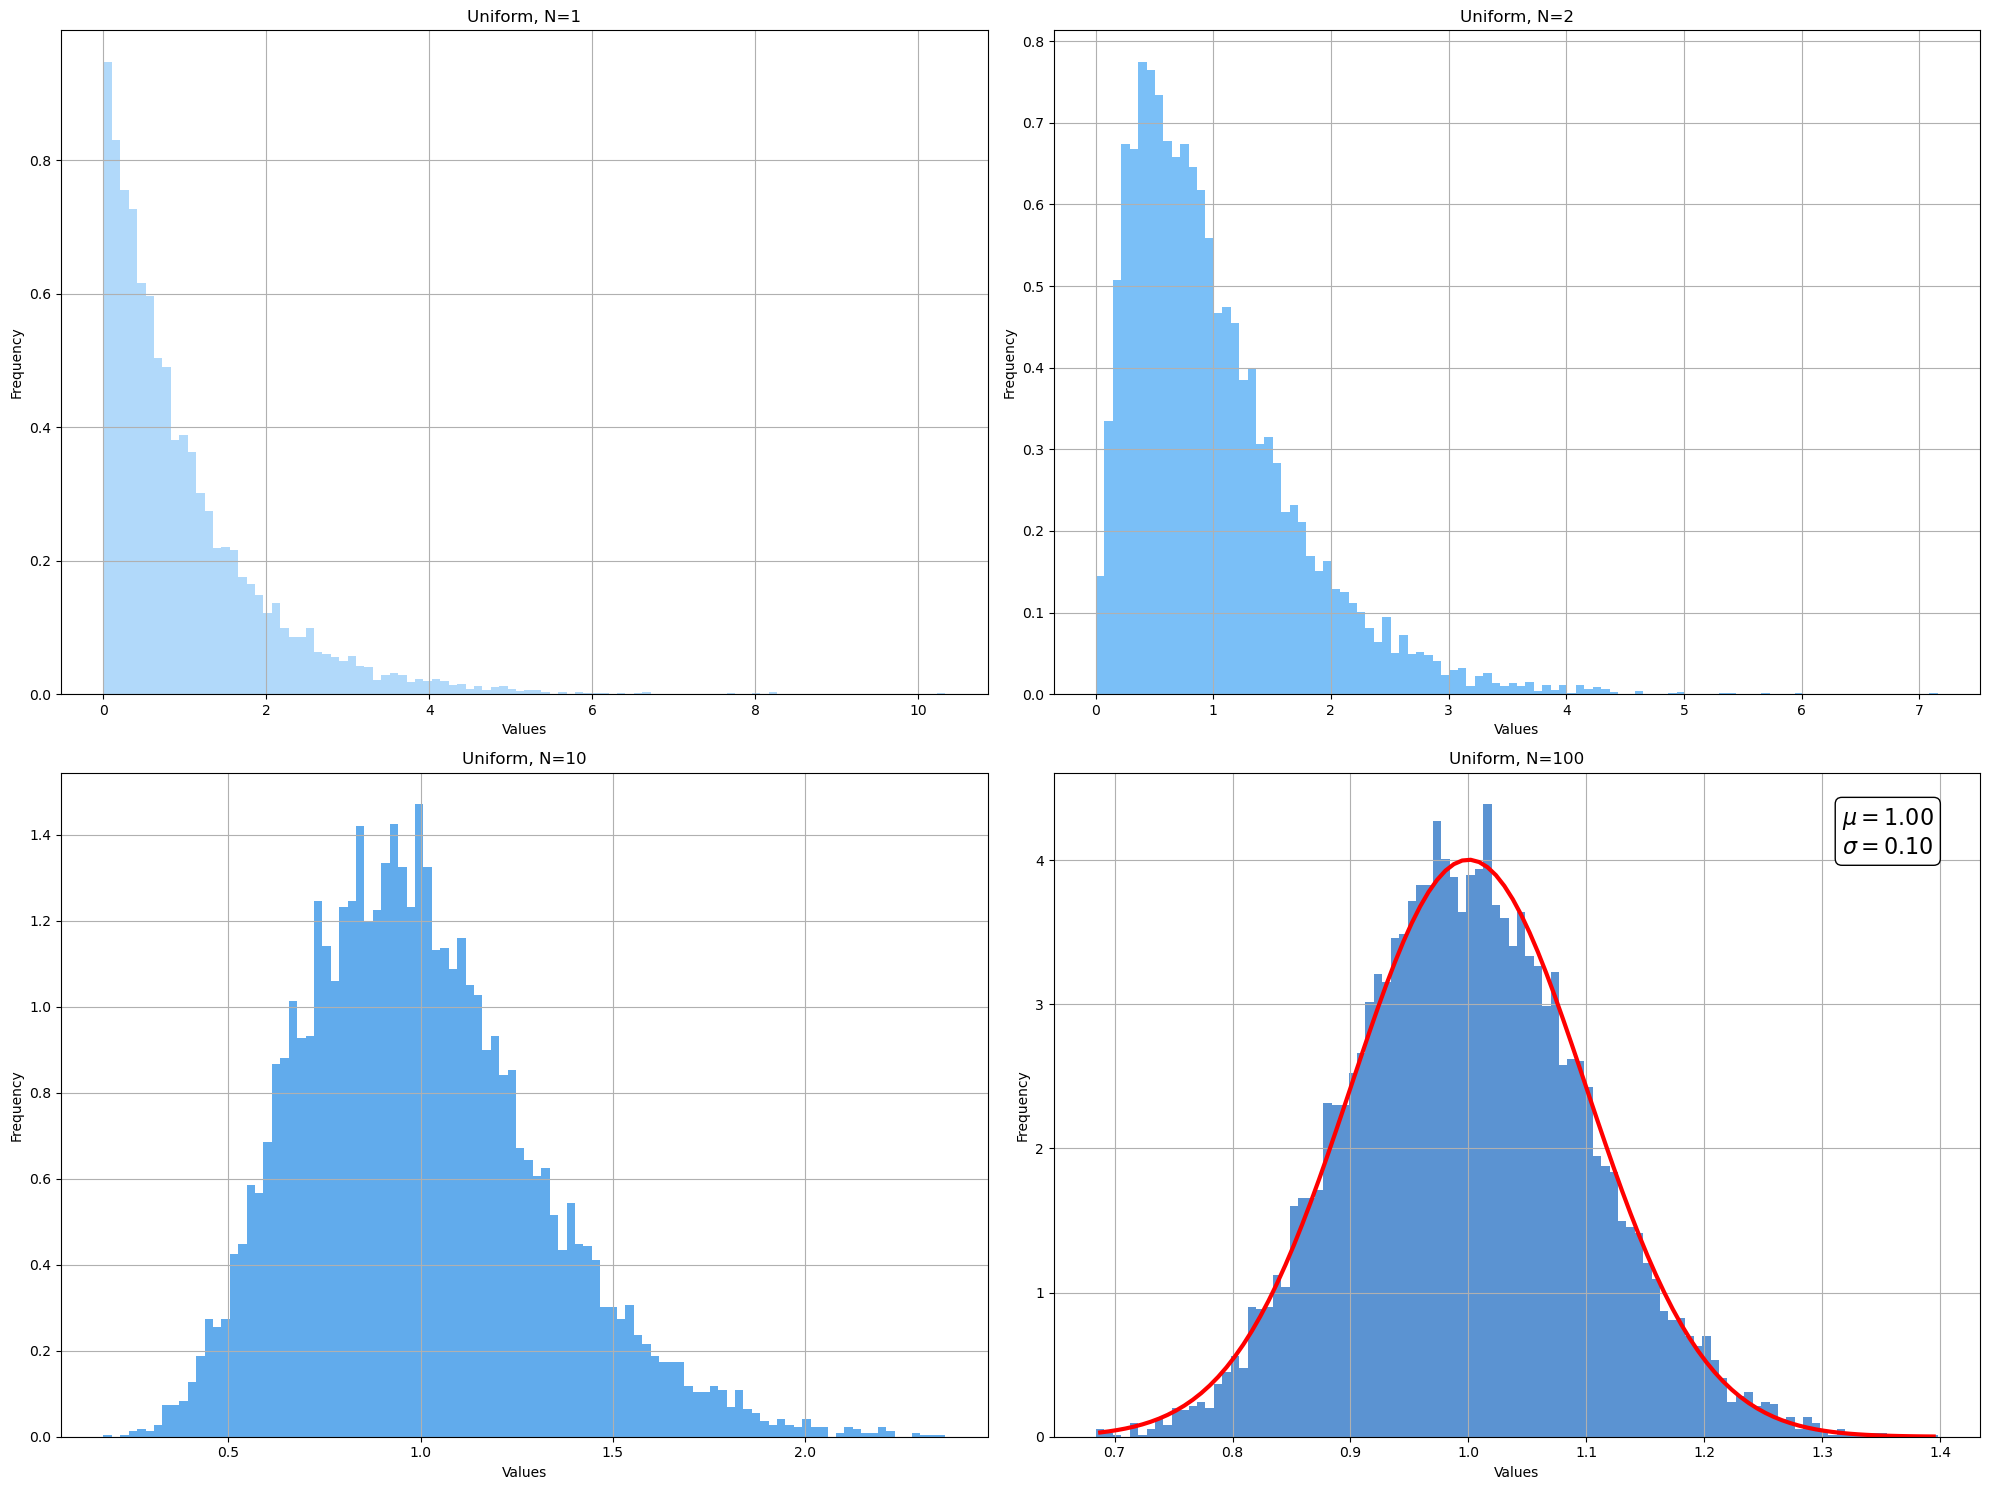

In [17]:
# Funzione per creare un istogramma con o senza fit gaussiano
def create_histogram(ax, data, column, title, color, fit_gaussian=False):
    # Crea l'istogramma
    counts, bins, _ = ax.hist(data[column], bins=100, color=color, alpha=0.7, density=True)
    
    if fit_gaussian:
        # Calcola il centro di ciascun bin
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        # Esegui il fit con una distribuzione gaussiana
        (mu, sigma) = norm.fit(data[column])
        
        # Crea una distribuzione gaussiana con i parametri ottenuti
        y = norm.pdf(bin_centers, mu, sigma)
        
        # Sovrapponi il fit all'istogramma
        ax.plot(bin_centers, y, 'r', linewidth=3)
        
        # Aggiungi i parametri del fit al grafico
        bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
        ax.text(0.95, 0.95, rf'$\mu={mu:.2f}$''\n'rf'$\sigma={sigma:.2f}$', 
                transform=ax.transAxes, fontsize=16, verticalalignment='top', horizontalalignment='right',
                bbox=bbox_props)
    
    # Aggiungi etichette e titolo
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    ax.set_title(title)

# Leggi i dati dai file
data0 = pd.read_csv('01.2/output_0.dat', sep=' ', header=None)
data1 = pd.read_csv('01.2/output_1.dat', sep=' ', header=None)
data2 = pd.read_csv('01.2/output_2.dat', sep=' ', header=None)
data3 = pd.read_csv('01.2/output_3.dat', sep=' ', header=None)

# Crea i grafici
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Crea istogrammi per ogni colonna dei file
create_histogram(axs[0, 0], data0, 1, 'Uniform, N=1', '#90CAF9')
create_histogram(axs[0, 1], data1, 1, 'Uniform, N=2', '#42A5F5')
create_histogram(axs[1, 0], data2, 1, 'Uniform, N=10', '#1E88E5')
create_histogram(axs[1, 1], data3, 1, 'Uniform, N=100', '#1565C0', fit_gaussian=True)

# Mostra i grafici
plt.tight_layout()
plt.show()

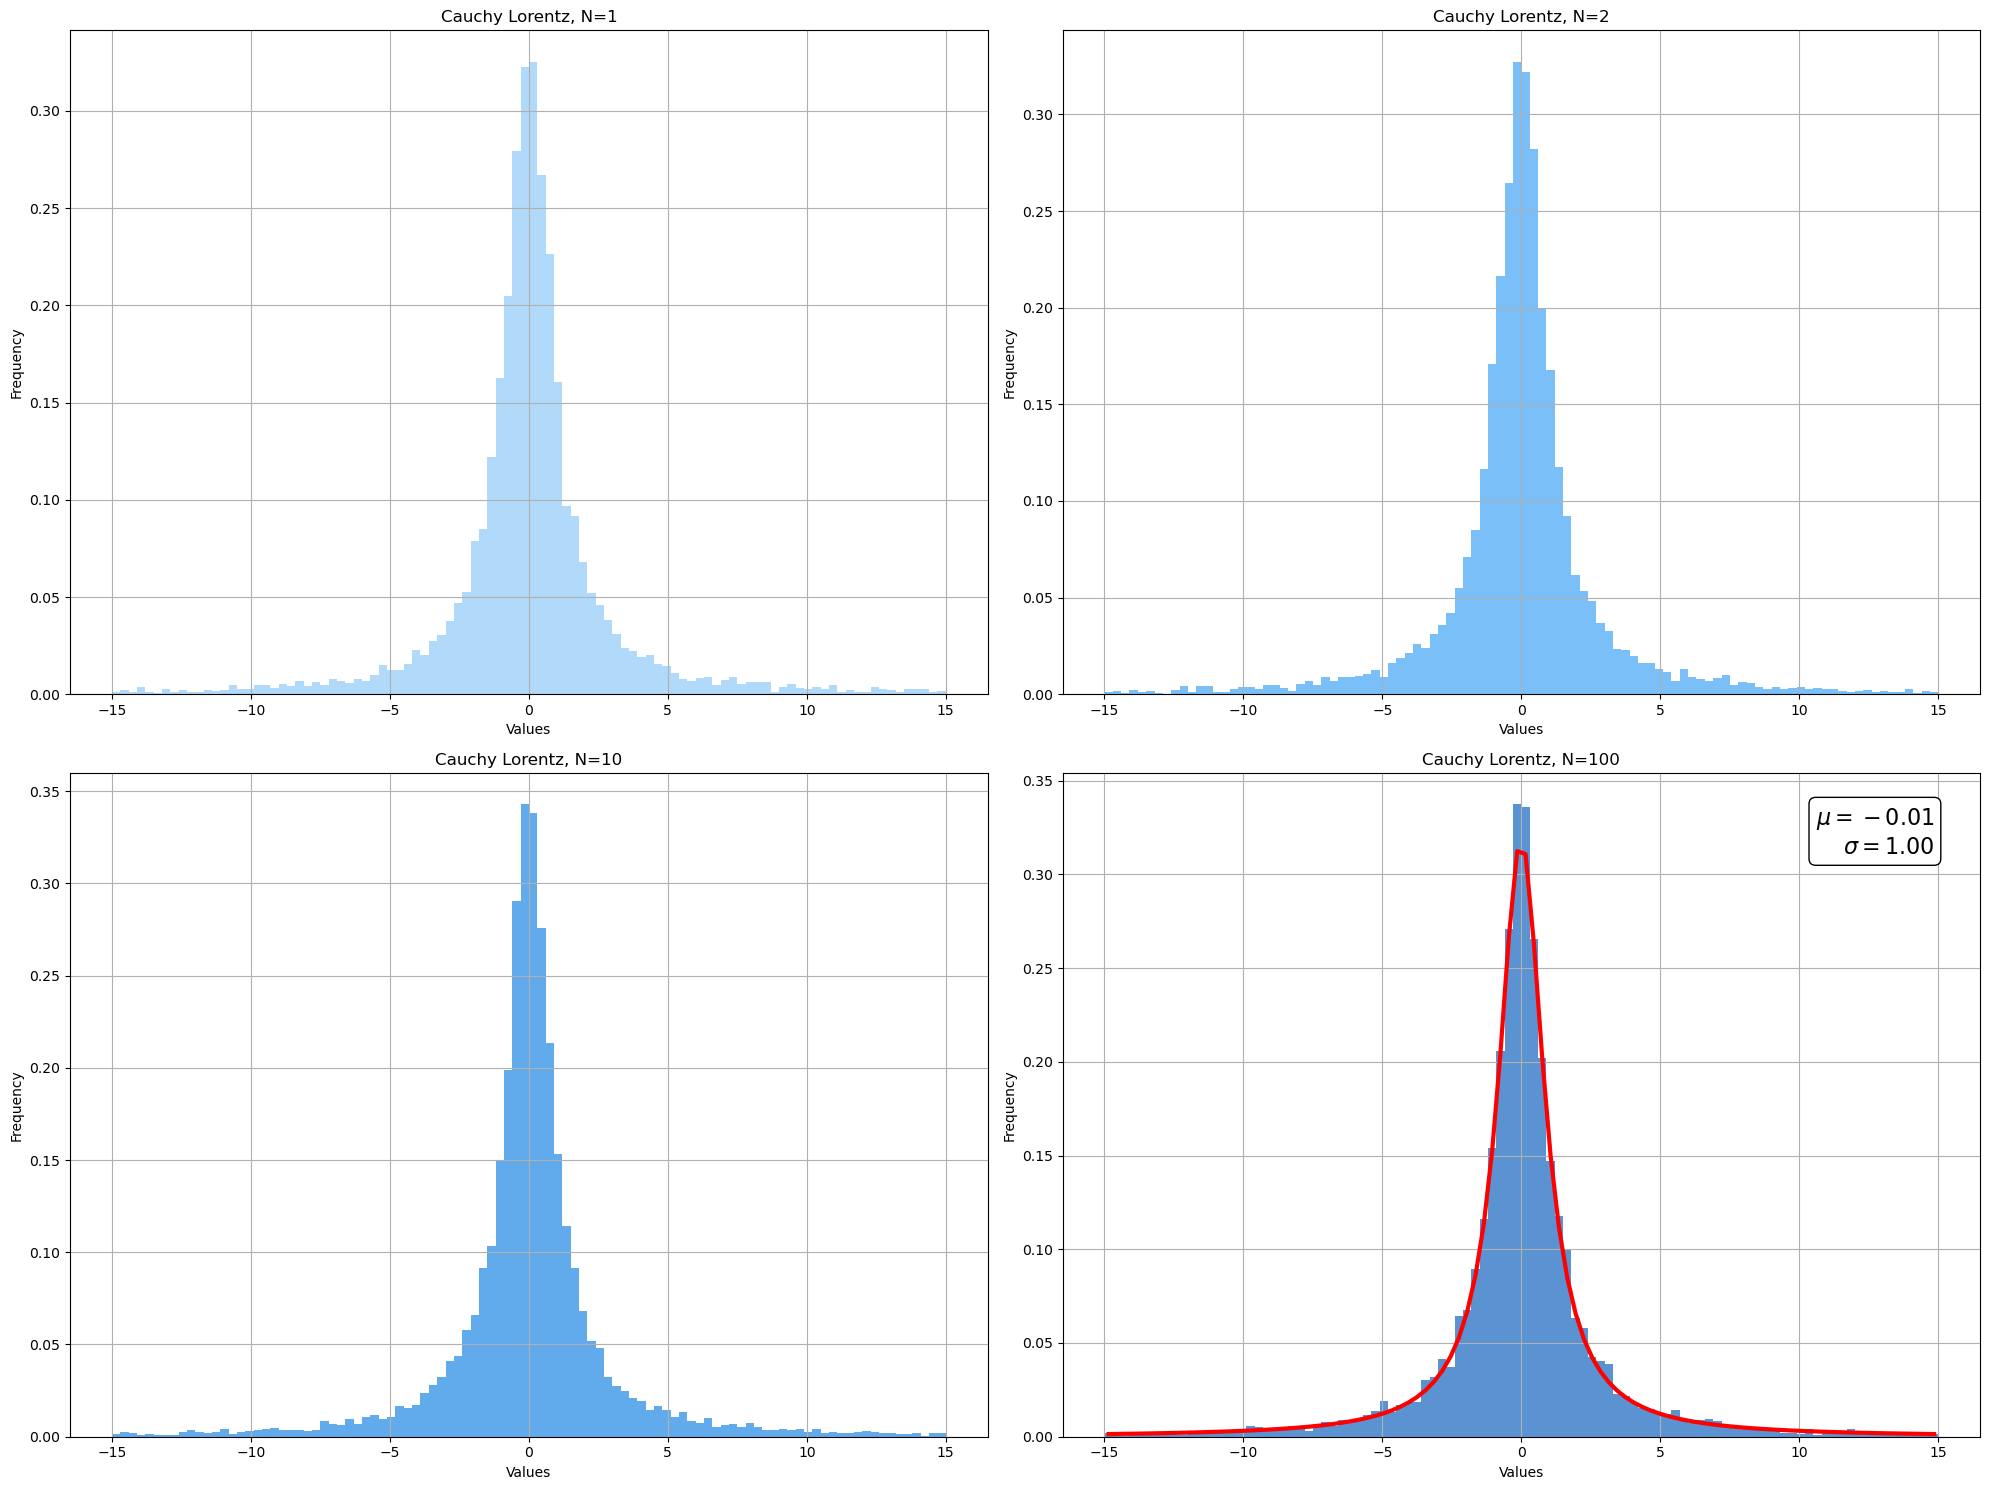

In [18]:
# Funzione per creare un istogramma con o senza fit
def create_histogram(ax, data, column, title, color, fit_type=None):
    counts, bins, _ = ax.hist(data[column], bins=100, color=color, alpha=0.7, density=True, range = (-15, 15))
    
    if fit_type == 'cauchy':
        bin_centers = (bins[:-1] + bins[1:]) / 2
        (loc, scale) = cauchy.fit(data[column])
        y = cauchy.pdf(bin_centers, loc, scale)
        ax.plot(bin_centers, y, 'r', linewidth=3)
        
        bbox_props = dict(boxstyle="round,pad=0.3", facecolor="white")
        ax.text(0.95, 0.95, rf'$\mu={loc:.2f}$''\n'rf'$\sigma={scale:.2f}$', 
                transform=ax.transAxes, fontsize=16, verticalalignment='top', horizontalalignment='right',
                bbox=bbox_props)
    
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    ax.set_title(title)

data0 = pd.read_csv('01.2/output_0.dat', sep=' ', header=None)
data1 = pd.read_csv('01.2/output_1.dat', sep=' ', header=None)
data2 = pd.read_csv('01.2/output_2.dat', sep=' ', header=None)
data3 = pd.read_csv('01.2/output_3.dat', sep=' ', header=None)

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

create_histogram(axs[0, 0], data0, 2, 'Cauchy Lorentz, N=1', '#90CAF9')
create_histogram(axs[0, 1], data1, 2, 'Cauchy Lorentz, N=2', '#42A5F5')
create_histogram(axs[1, 0], data2, 2, 'Cauchy Lorentz, N=10', '#1E88E5')
create_histogram(axs[1, 1], data3, 2, 'Cauchy Lorentz, N=100', '#1565C0', fit_type='cauchy')

# Mostra i grafici
plt.tight_layout()
plt.show()

## Esercizio 01.3
Simulation of the Buffon's experiment. 

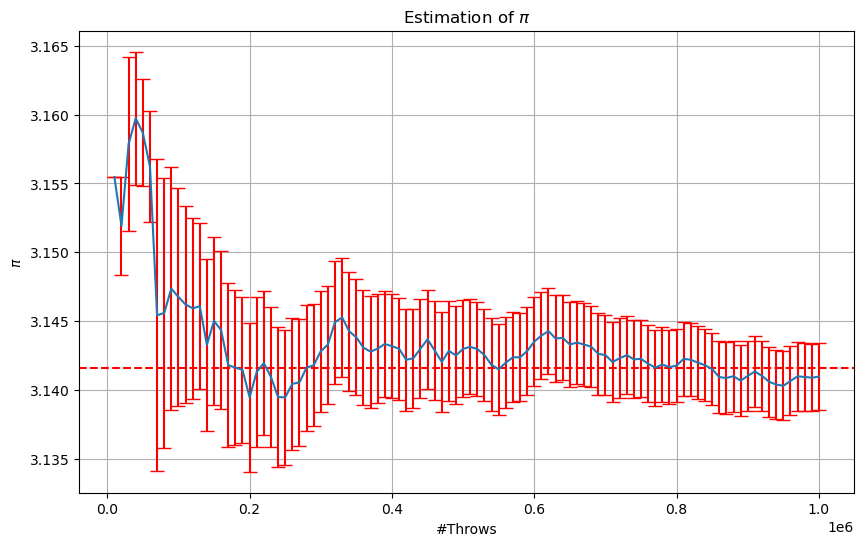

In [19]:
# Leggi i dati dal file
data = pd.read_csv('01.3/dataBuffonClass.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
y = data[1]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, ecolor='r', capsize=5)
plt.axhline(y=np.pi, color='r', linestyle='--', label=r'$\pi$')
plt.xlabel('#Throws')
plt.ylabel(r'$\pi$')
plt.title('Estimation of 'rf'$\pi$')
plt.grid(True)
plt.show()